<a href="https://colab.research.google.com/github/siddheshpednekar/dlpracts/blob/main/batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('/content/drive/MyDrive/dataset/concertriccir2.csv', names = ['x1', 'x2', 'y'])

In [23]:
df

,x1,x2,y
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


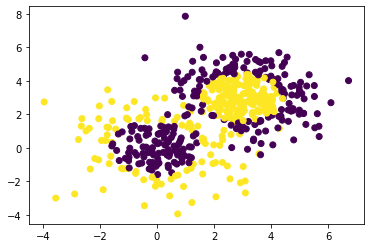

In [24]:
import matplotlib.pyplot as plt
plt.scatter(df['x1'], df['x2'], c=df['y'])

In [26]:
x=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [27]:
x.shape, y.shape

((500, 2), (500,))

In [28]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [35]:
from keras.layers.normalization.batch_normalization import BatchNormalizationBase
model = Sequential()
model.add(Dense(units=2,input_dim=2,activation='relu'))
model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history1 = model.fit(x, y, epochs=200, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
13/13 [==============================] - 1s 17ms/step - loss: 0.6943 - accuracy: 0.5325 - val_loss: 0.6957 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5375 - val_loss: 0.6958 - val_accuracy: 0.4300
Epoch 3/200
13/13 [====================

In [36]:
from keras.layers.normalization.batch_normalization import BatchNormalizationBase
model = Sequential()
model.add(Dense(units=2,input_dim=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 batch_normalization_2 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 2)                 6         
                                                                 
 batch_normalization_3 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 31
Trainable params: 23
Non-trainable pa

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(x, y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 19ms/step - loss: 0.6931 - accuracy: 0.4900 - val_loss: 1.1362 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5075 - val_loss: 0.9920 - val_accuracy: 0.5600
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.5125 - val_loss: 0.8920 - val_accuracy: 0.5600
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5075 - val_loss: 0.8250 - val_accuracy: 0.5400
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6758 - accuracy: 0.5175 - val_loss: 0.7740 - val_accuracy: 0.5400
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6749 - accuracy: 0.5250 - val_loss: 0.7382 - val_accuracy: 0.5300
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.5225 - val_loss: 0.7117 - val_accuracy: 0.5100
Epoch 8/200


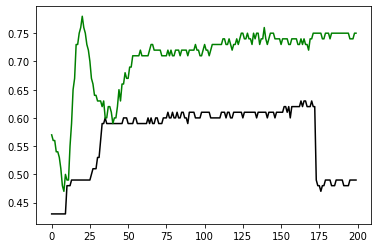

In [38]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history.history['val_accuracy'],color='green')